# Data Scientist Professional Practical Exam Submission Szalka Áron

To get the Data Science Professional Certificaation from DataCamp, I had to analyse data and report it from a busieness point of view. At the end of it I also had to give some recommendations for the business and support my arguments with data-driven reasoning. This had to be done independently, only the task list and the dataset was given. Below is my solution.

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('datacamp_data_scientist_professional_final_test_Szalka_Áron_data.csv')

**Data validation**

This data set has 947 rows and 7 columns. Some values are missing and some cleaning was needed to make the data suitable for analyses. 52 rows had missing nutrition data, these were dropped and 895 row remained.

recipe: unique identifier or the row. No cleaning is needed.

calories: numeric data about the amount of calories. No changes is nedded.

carbohydrate: numeric data about the amount of carbohydrates. No changes is nedded.

sugar: numeric data about the amount of sugar. No changes is nedded.

protein: numeric data about the amount of protein. No changes is nedded.

category: string categories about the category of the meal. The 'Chicken Breast' category was added the the 'Chicken' category. 10 distinct meal categories.

servings: Information about how many servings can the meal include. '4 as a Snack' and '6 as a Snack' categories were included in the 4 and 6 categories respectively, leaving 4 distinct categores. They were changed to integer format.

high_traffic: category that shows if the recipe produced high traffic on the website or not. Only the 'High' category was included in the data so the empty values were filled as 'Low'. 

Later in the analysis process all of these data were transformed into numbers in some way to be ready for applying to machine learning models and log transformation was applied to some of the colums, these were described later when these trasformations took place.

In [3]:
data['high_traffic'] = data['high_traffic'].fillna('Low')
data['servings'] = data['servings'].str.replace('4 as a snack', '4')
data['servings'] = data['servings'].str.replace('6 as a snack', '6')
data['servings'] = data['servings'].astype('int')
data['category'] = data['category'].str.replace('Chicken Breast', 'Chicken')
data = data.dropna()

**Exploratory analysis**

First I made some exploratory analysis on the catergorical variables. Is is visible, that there are more high traffic values in the data set, than low, but not by much. The serving numbers distribute rougly evenly, except the 4 servings meal, that are more numerous. The categories distribute also roghly evenly, except the chicken meals are more numerous.

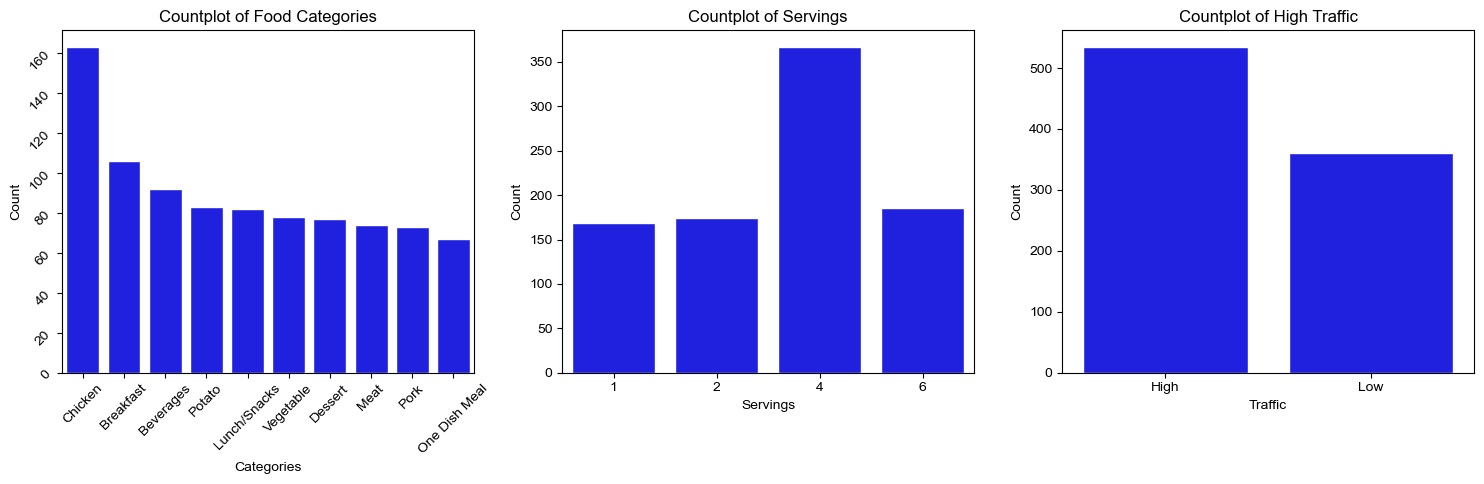

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.set(style="whitegrid")
sns.countplot(data=data, order=data['category'].value_counts().index, x='category', palette=["blue"], ax=axes[0])
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Count")
axes[0].set_title("Countplot of Food Categories")
axes[0].tick_params(rotation=45)

sns.set(style="whitegrid")
sns.countplot(data=data, x='servings', palette=["blue"], ax=axes[1])
axes[1].set_xlabel("Servings")
axes[1].set_ylabel("Count")
axes[1].set_title("Countplot of Servings")


sns.set(style="whitegrid")
sns.countplot(data=data, x='high_traffic', palette=["blue"], ax=axes[2])
axes[2].set_xlabel("Traffic")
axes[2].set_ylabel("Count")
axes[2].set_title("Countplot of High Traffic")


plt.tight_layout()
plt.show()

If we look at the distribution of high and low traffic values in the other categorical varibles, we see more or less similar proportion in the case of serving categories. However there are vers significant differences between the meal types in what percent they produced high traffic. Some meal types like potato, vegetables and pork almost always generated high traffic, while beverages almost never.  

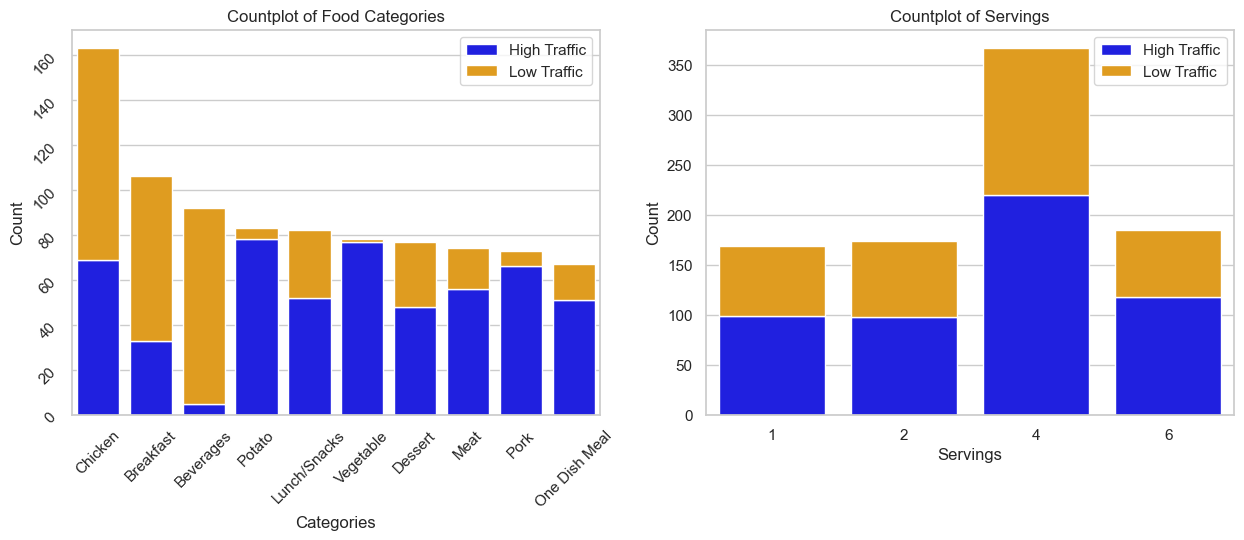

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data2 =data.pivot_table(index='category', columns='high_traffic', aggfunc='size', fill_value=0).reindex(data['category'].value_counts().index)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=data2, x=data2.index, y='High', color='blue', label='High Traffic', ax = axes[0])
sns.barplot(data=data2, x=data2.index, y='Low', bottom=data2['High'], color='orange', label='Low Traffic', ax = axes[0])
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Count")
axes[0].set_title("Countplot of Food Categories")
axes[0].tick_params(rotation=45)
axes[0].legend()

data3 = data.pivot_table(index='servings', columns='high_traffic', aggfunc='size', fill_value=0)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=data3, x=data3.index, y='High', color='blue', label='High Traffic', ax = axes[1])
sns.barplot(data=data3, x=data3.index, y='Low', bottom=data3['High'], color='orange', label='Low Traffic', ax = axes[1])
axes[1].set_xlabel("Servings")
axes[1].set_ylabel("Count")
axes[1].set_title("Countplot of Servings")
axes[1].legend()



plt.tight_layout()
plt.show()

In analysing the distribution of the numeric variables, I found that all of them are very much right skewed, so I generated the logaritmized version of them as well. The distributions can be seen below, as well as the correlation matrixes of the original variables and the logaritmitzed variables. There is no strong correlation in any case between the varibles.

In [6]:
data['log_calories'] = np.log(data['calories']+0.3)
data['log_carbohydrate'] = np.log(data['carbohydrate']+0.3)
data['log_sugar'] = np.log(data['sugar']+0.3)
data['log_protein'] = np.log(data['protein']+0.3)

C:\Users\Áron\AppData\Local\Temp\ipykernel_10132\3202536060.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='calories', palette=["blue"], ax=axes[0,0])
C:\Users\Áron\AppData\Local\Temp\ipykernel_10132\3202536060.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='carbohydrate', palette=["blue"], ax=axes[0,1])
C:\Users\Áron\AppData\Local\Temp\ipykernel_10132\3202536060.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='sugar', palette=["blue"], ax=axes[0,2])
C:\Users\Áron\AppData\Local\Temp\ipykernel_10132\3202536060.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='protein', palette=["blue"], ax=axes[0,3])
C:\Users\Áron\AppData\Local\Temp\ipykernel_10132\3202536060.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been ass

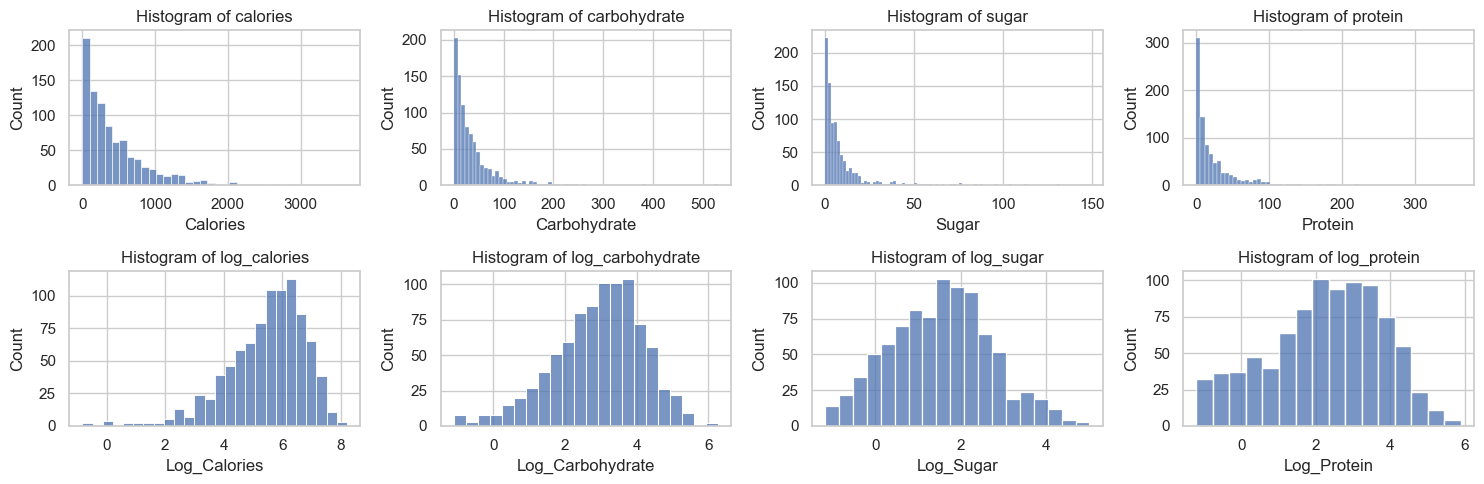

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

sns.set(style="whitegrid")
sns.histplot(data=data, x='calories', palette=["blue"], ax=axes[0,0])
axes[0,0].set_xlabel("Calories")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Histogram of calories")


sns.set(style="whitegrid")
sns.histplot(data=data, x='carbohydrate', palette=["blue"], ax=axes[0,1])
axes[0,1].set_xlabel("Carbohydrate")
axes[0,1].set_ylabel("Count")
axes[0,1].set_title("Histogram of carbohydrate")


sns.set(style="whitegrid")
sns.histplot(data=data, x='sugar', palette=["blue"], ax=axes[0,2])
axes[0,2].set_xlabel("Sugar")
axes[0,2].set_ylabel("Count")
axes[0,2].set_title("Histogram of sugar")

sns.set(style="whitegrid")
sns.histplot(data=data, x='protein', palette=["blue"], ax=axes[0,3])
axes[0,3].set_xlabel("Protein")
axes[0,3].set_ylabel("Count")
axes[0,3].set_title("Histogram of protein")


sns.set(style="whitegrid")
sns.histplot(data=data, x='log_calories', palette=["blue"], ax=axes[1,0])
axes[1,0].set_xlabel("Log_Calories")
axes[1,0].set_ylabel("Count")
axes[1,0].set_title("Histogram of log_calories")


sns.set(style="whitegrid")
sns.histplot(data=data, x='log_carbohydrate', palette=["blue"], ax=axes[1,1])
axes[1,1].set_xlabel("Log_Carbohydrate")
axes[1,1].set_ylabel("Count")
axes[1,1].set_title("Histogram of log_carbohydrate")


sns.set(style="whitegrid")
sns.histplot(data=data, x='log_sugar', palette=["blue"], ax=axes[1,2])
axes[1,2].set_xlabel("Log_Sugar")
axes[1,2].set_ylabel("Count")
axes[1,2].set_title("Histogram of log_sugar")

sns.set(style="whitegrid")
sns.histplot(data=data, x='log_protein', palette=["blue"], ax=axes[1,3])
axes[1,3].set_xlabel("Log_Protein")
axes[1,3].set_ylabel("Count")
axes[1,3].set_title("Histogram of log_protein")

plt.tight_layout()
plt.show()

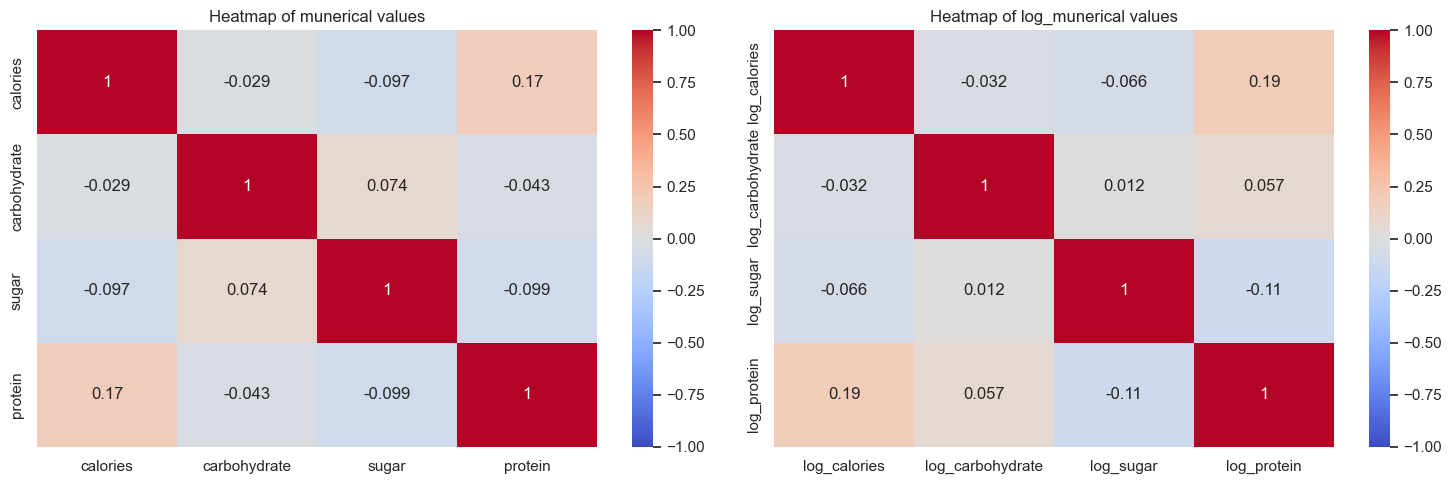

In [8]:
correlation_matrix_sima = data[['calories','carbohydrate','sugar','protein']].corr()
correlation_matrix_log = data[['log_calories','log_carbohydrate','log_sugar','log_protein']].corr()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(correlation_matrix_sima, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax = axes[0])
axes[0].set_title("Heatmap of munerical values")
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax = axes[1])
axes[1].set_title("Heatmap of log_munerical values")
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Comparing the traffic category with the numeric variables, I created boxplots, however these didn't show significant differences in the variables distribution neither with the original values nor with the logaritmized values.

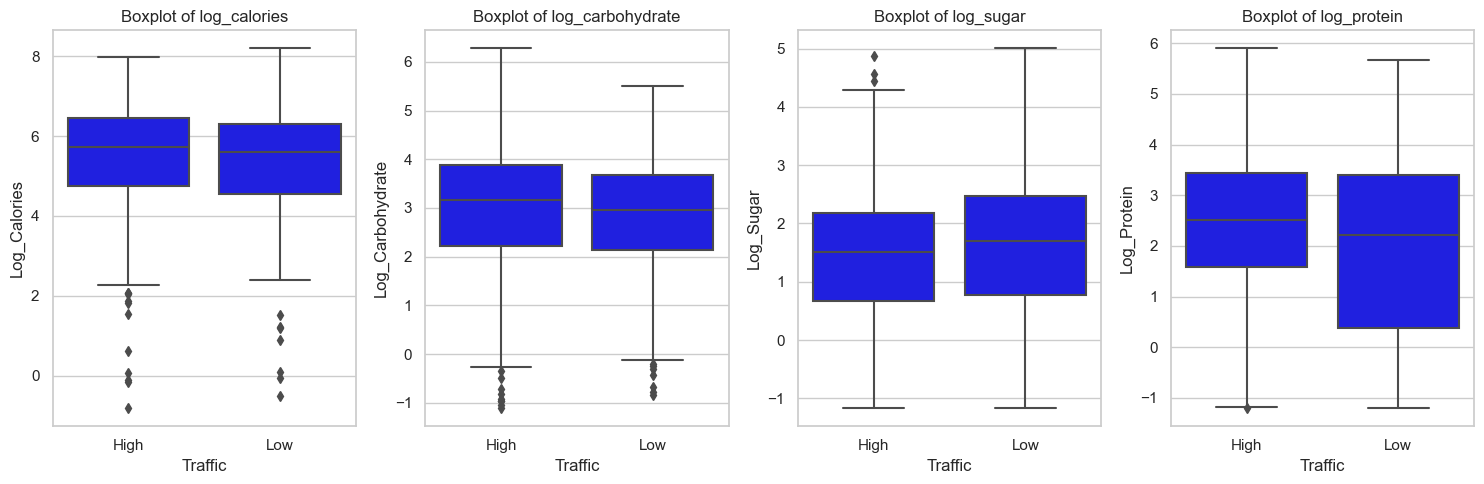

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.set(style="whitegrid")
sns.boxplot(data=data, y='log_calories', x= 'high_traffic' , palette=["blue"], ax=axes[0])
axes[0].set_xlabel("Traffic")
axes[0].set_ylabel("Log_Calories")
axes[0].set_title("Boxplot of log_calories")


sns.set(style="whitegrid")
sns.boxplot(data=data, y='log_carbohydrate',x= 'high_traffic', palette=["blue"], ax=axes[1])
axes[1].set_xlabel("Traffic")
axes[1].set_ylabel("Log_Carbohydrate")
axes[1].set_title("Boxplot of log_carbohydrate")


sns.set(style="whitegrid")
sns.boxplot(data=data, y='log_sugar',x= 'high_traffic', palette=["blue"], ax=axes[2])
axes[2].set_xlabel("Traffic")
axes[2].set_ylabel("Log_Sugar")
axes[2].set_title("Boxplot of log_sugar")

sns.set(style="whitegrid")
sns.boxplot(data=data, y='log_protein',x= 'high_traffic', palette=["blue"], ax=axes[3])
axes[3].set_xlabel("Traffic")
axes[3].set_ylabel("Log_Protein")
axes[3].set_title("Boxplot of log_protein")


plt.tight_layout()
plt.show()

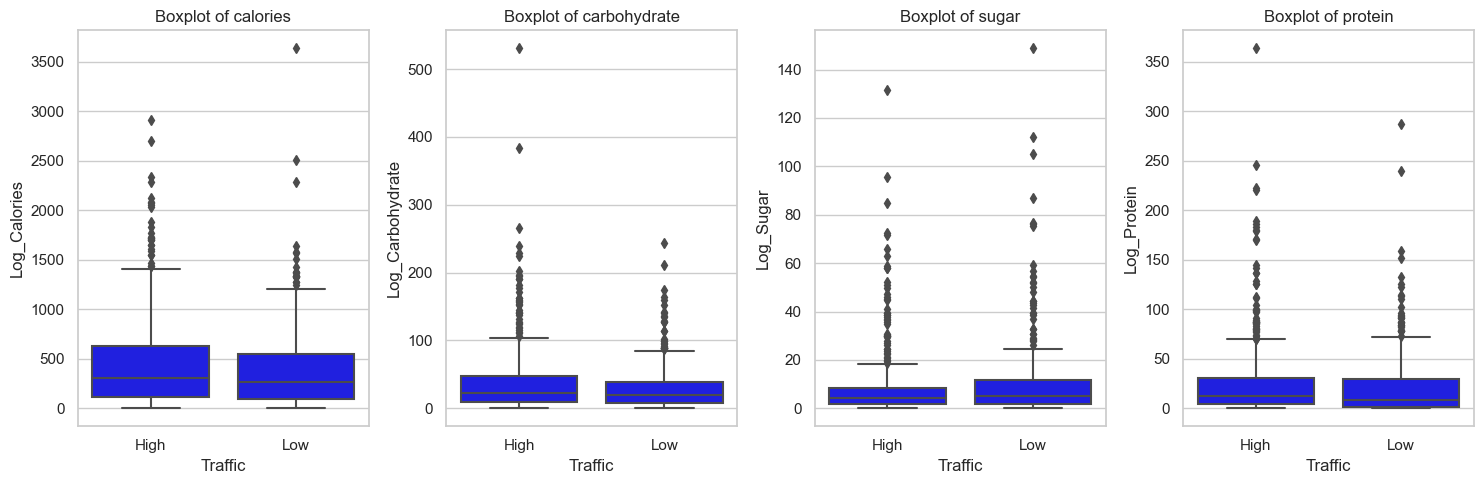

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.set(style="whitegrid")
sns.boxplot(data=data, y='calories', x= 'high_traffic' , palette=["blue"], ax=axes[0])
axes[0].set_xlabel("Traffic")
axes[0].set_ylabel("Log_Calories")
axes[0].set_title("Boxplot of calories")


sns.set(style="whitegrid")
sns.boxplot(data=data, y='carbohydrate',x= 'high_traffic', palette=["blue"], ax=axes[1])
axes[1].set_xlabel("Traffic")
axes[1].set_ylabel("Log_Carbohydrate")
axes[1].set_title("Boxplot of carbohydrate")


sns.set(style="whitegrid")
sns.boxplot(data=data, y='sugar',x= 'high_traffic', palette=["blue"], ax=axes[2])
axes[2].set_xlabel("Traffic")
axes[2].set_ylabel("Log_Sugar")
axes[2].set_title("Boxplot of sugar")

sns.set(style="whitegrid")
sns.boxplot(data=data, y='protein',x= 'high_traffic', palette=["blue"], ax=axes[3])
axes[3].set_xlabel("Traffic")
axes[3].set_ylabel("Log_Protein")
axes[3].set_title("Boxplot of protein")


plt.tight_layout()
plt.show()

**Model fitting ang evaluation**

Predicting the traffic category is a classification problem. I am choosing Logistic regression because it's suited for binary classification and its result are relatively easy to interpret. The comparison model I am choosing is the Decision tree classifier, because it's also easy to interpret and some meal categories were homogenous enough to help the model sort them more easily. Both of the cases I use GridSearch to find the best parameters for the model.

For the evaluation I use accuracy score, as the models test themselves on the test set after training. I chose the model that predicts the test data more accurately.


**Prepare Data for Modelling**

To enable modelling, I chose servings, meal type, log_calories, log_carbohydrate, log_sugar, log_protein as features, high traffic as target variables. I also have made the following changes:
- Labelencoded the high_traffic colum in order to get 0 and 1 values instead of the 'High' and 'Low' strings
- Encoded the meal type colum into 10 dummy colums, a separete one for each category


In [11]:
label_encoder = LabelEncoder()
data['high_traffic_encoded'] = label_encoder.fit_transform(data['high_traffic'])
data = pd.get_dummies(data, columns=['category'], prefix=['category'])

In [12]:
X = data.drop(columns=['high_traffic', 'high_traffic_encoded', 'calories', 'carbohydrate', 'sugar', 'protein','recipe'])
y = data['high_traffic_encoded']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],  # Solver algorithm
}

# Create the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']
best_solver = best_params['solver']

# Create a Logistic Regression classifier with the best hyperparameters
best_logistic_classifier = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver=best_solver,
    random_state=42
)

# Fit the best classifier to the training data
best_logistic_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_logistic = best_logistic_classifier.predict(X_test)
accuracy_score(y_test, y_pred_logistic)

0.776536312849162

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be a leaf node
}

# Create the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Create a Decision Tree classifier with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

# Fit the best classifier to the training data
best_tree_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_tree_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7206703910614525

**Results**

The accuray score in the logistic regression with the best possible paramaters tried is 0.776 while in the case of the decision tree the best achieved was only 0.72. This means the logistic regression could classify more accurately the test date than the decision tree, therefore I chose the logistic regression as the used model. None of the two could reached the originally aimed 80% goal, however 77.6% is very close to that.

**Evaluate by Business criteria**

The company wants to share high traffic generating recipes as often as possible. For this the most important for them is to have as high share of high traffic gereating recipes as possible from those that were predicted to be such - and they care less about those that were categorized as low traffic generating. In this regard the logistic regression could reach 80% as it predicted 111 recipies to be 'high_traffic' of which 89 was. That is 80.18%. The confusion matrix can be seen below.

If we go deeper into the details of the coefficients of the logistic regression, we can have some general guidelines about the caracteristics of the successful high traffic generating recipes and the low traffic generating ones. We can see that most of the parameters has almost no effect, however the meal category seems to have a great importance in traffic generating. Vegetable, Potato and Pork imporves the chance of high traffic greatly, while Beverages, Breakfast and Chicken reduces it.

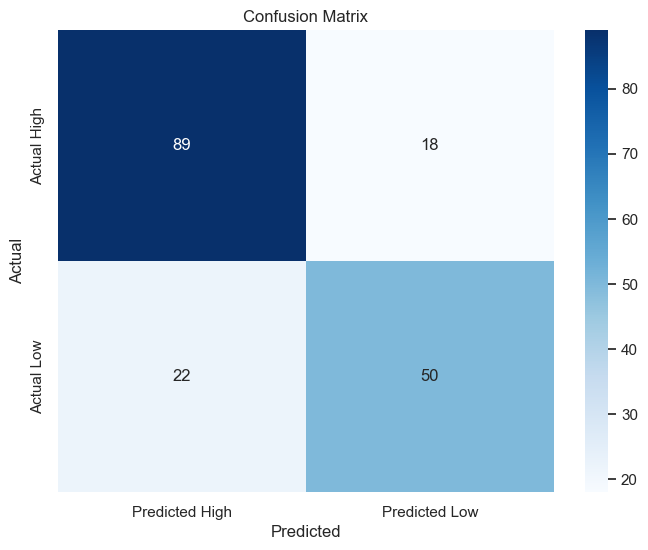

In [15]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted High', 'Predicted Low'], yticklabels=['Actual High', 'Actual Low'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

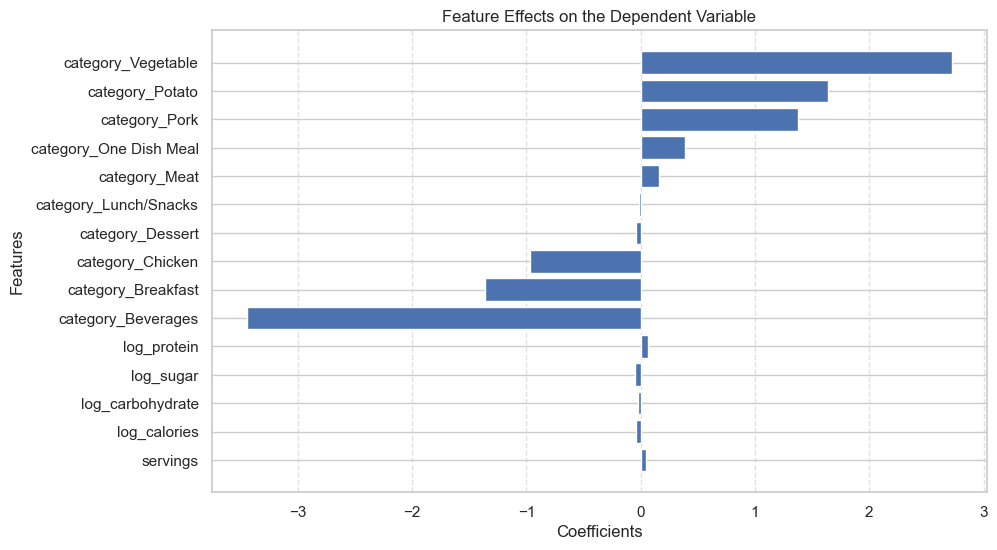

In [16]:
feature_names = X.columns.tolist()
coefficients = (-1*best_logistic_classifier.coef_[0]).tolist()


plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)  # Use barh to create a horizontal bar chart
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.title("Feature Effects on the Dependent Variable")
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.show()

**Recommendations**

For improving the share of high traffic generation recipes on our company's website, I recommend using the Logistic regression model trained on our current data, and share recipes only that are predicted to be high traffic generating by the model. With this we can get above 80% of the recipes published to be high traffic generating, at least it seems so according to our test data. The following steps are neccesary to maintain and improve the model in the future:
- Collect the remaining data from the recipes that were not included in our dataset, such as time to make, cost per serving, ingredients.
- Continusly expend the database with new recipes and their performance on the website, as mode data can lead to more accurate predictions
- Develop an API or use some efficient deployment strategythat reduces human error possibility that uses the model.
- Consider leaving our entire food categories that perform very bad such as Beverages or Breakfast.
- Consider using categories that has even higher high traffic generating share than 80%, such as Vegetable category, as long as the users dont't mind the lack of variety in recipes categories.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation